In [ ]:
pip install librosa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Load the CSV file with features
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/features_30_sec.csv')

# Set filename as the index and drop the 'label' column
df.set_index('filename', inplace=True)
df.drop(columns=['label','length'], inplace=True)

In [ ]:
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
n_components = 10
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

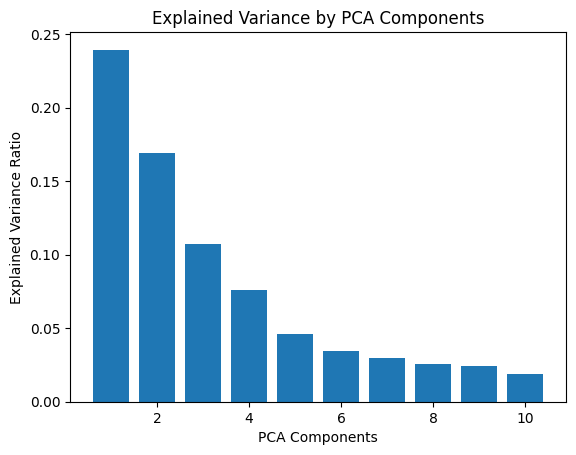

In [ ]:
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance)
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

In [ ]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)
df['Emotion'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_names = {
    0: 'Energetic Vibes',
    1: 'Upbeat Joy',
    2: 'Reflective Melodies'
}

# Rename cluster names in the 'Cluster' column
df['Emotion'] = df['Emotion'].replace(cluster_names)

# Display the top 5 rows of the dataframe
print(df.head())

                 chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
filename                                                                 
blues.00000.wav          0.350088         0.088757  0.130228  0.002827   
blues.00001.wav          0.340914         0.094980  0.095948  0.002373   
blues.00002.wav          0.363637         0.085275  0.175570  0.002746   
blues.00003.wav          0.404785         0.093999  0.141093  0.006346   
blues.00004.wav          0.308526         0.087841  0.091529  0.002303   

                 spectral_centroid_mean  spectral_centroid_var  \
filename                                                         
blues.00000.wav             1784.165850          129774.064525   
blues.00001.wav             1530.176679          375850.073649   
blues.00002.wav             1552.811865          156467.643368   
blues.00003.wav             1070.106615          184355.942417   
blues.00004.wav             1835.004266          343399.939274   

                 s

In [ ]:
silhouette_avg = silhouette_score(pca_result, cluster_labels)
calinski_harabasz_score_avg = calinski_harabasz_score(pca_result, cluster_labels)
davies_bouldin_score_avg = davies_bouldin_score(pca_result, cluster_labels)

print(f"Number of clusters: {n_clusters}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_score_avg}")

Number of clusters: 3
Silhouette Score: 0.24560702938839257
Calinski-Harabasz Score: 280.4089149411503
Davies-Bouldin Score: 1.5871504919535104


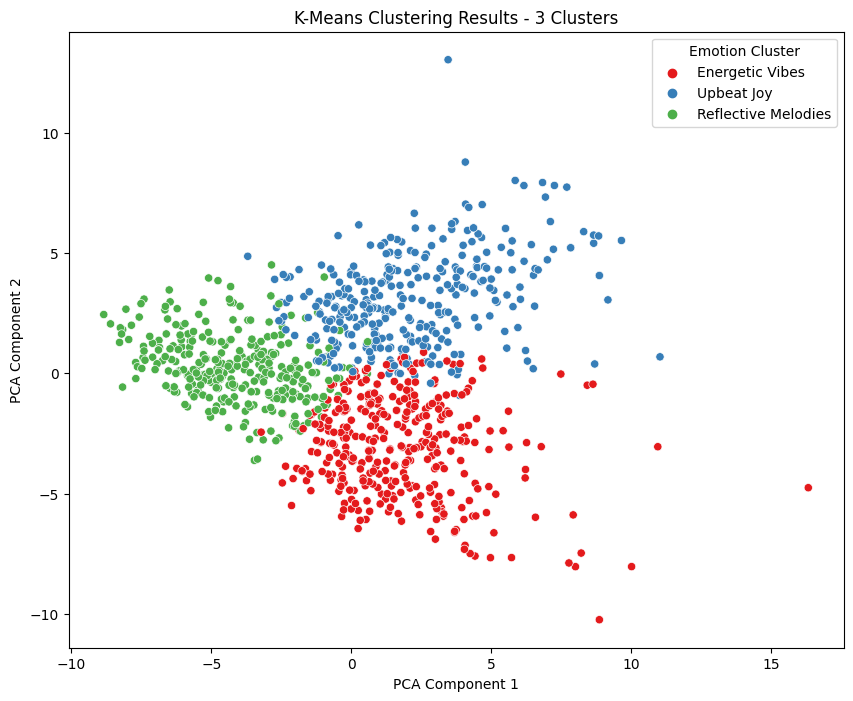

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing code for creating the scatter plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels, palette='Set1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering Results - {n_clusters} Clusters')

# Get the handles and labels of the current legend
handles, labels = scatter.get_legend_handles_labels()

# Create a new legend mapping cluster labels to emotion names
new_labels = [cluster_names[int(label)] for label in labels]

# Set the new legend labels
plt.legend(handles=handles, labels=new_labels, title='Emotion Cluster')

# Save the scatter plot as an image
plt.savefig('/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/cluster_plot.png')  # Change the filename and format as needed
plt.show()


In [ ]:
import random

grouped = df.groupby('Emotion')


for cluster, group in grouped:
    print(f"Cluster {cluster}:")
    random_rows = group.sample(n=1, random_state=42)
    print(random_rows[['Emotion']])
    print()

Cluster Energetic Vibes:
                           Emotion
filename                          
country.00021.wav  Energetic Vibes

Cluster Reflective Melodies:
                             Emotion
filename                            
metal.00007.wav  Reflective Melodies

Cluster Upbeat Joy:
                  Emotion
filename                 
pop.00081.wav  Upbeat Joy



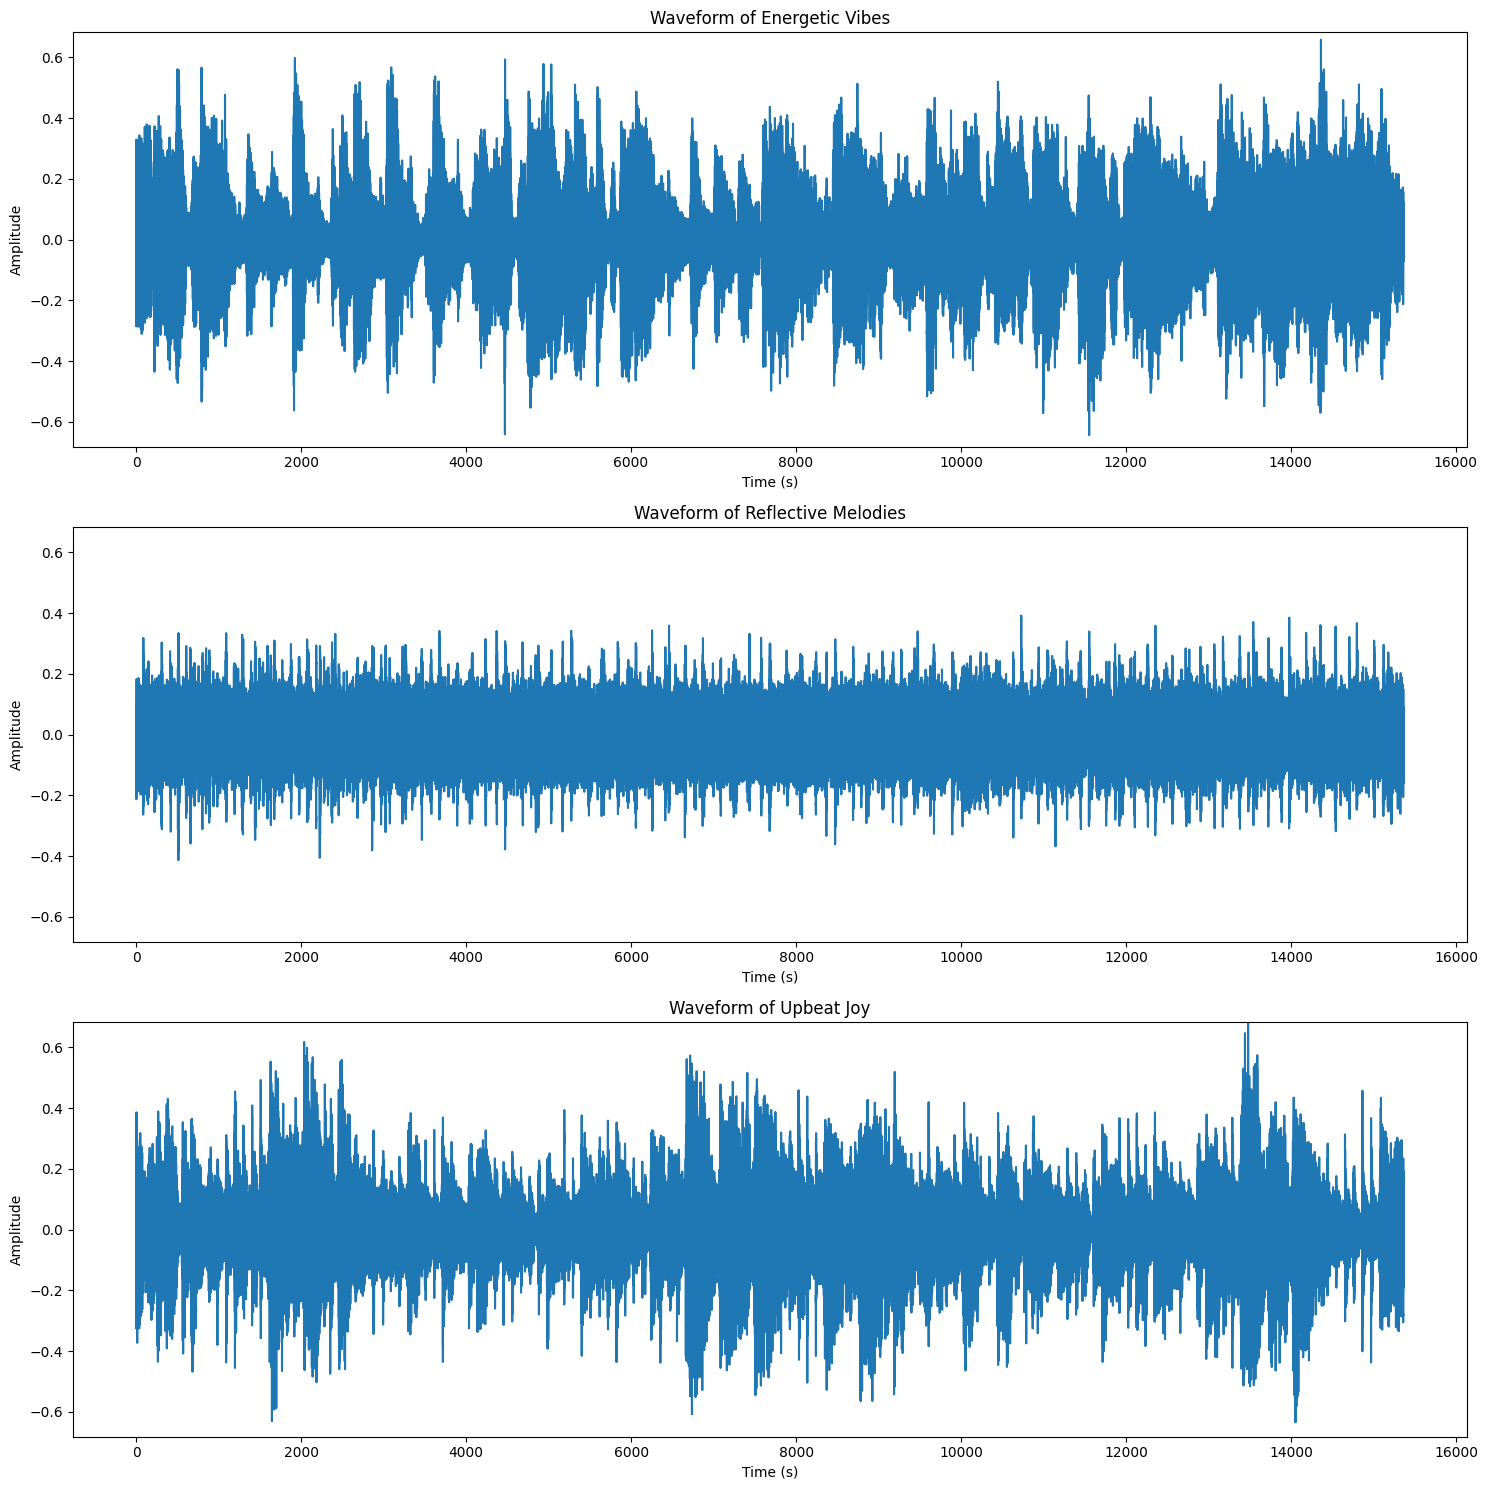

In [ ]:
import librosa
import matplotlib.pyplot as plt

# Load the audio files
audio_files = [
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/country.00021.wav",
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/metal.00007.wav",
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/pop.00081.wav"
]

# Create a dictionary to map audio file paths to titles
song_titles = {
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/country.00021.wav": "Energetic Vibes",
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/metal.00007.wav": "Reflective Melodies",
    "/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/Song Files Test/pop.00081.wav": "Upbeat Joy"
}

# Calculate the maximum range of amplitudes across all audio files
max_range = max(max(librosa.load(audio_file)[0]) for audio_file in audio_files)

# Create a figure for the waveform plots
plt.figure(figsize=(15, 5 * len(audio_files)))

for i, audio_file in enumerate(audio_files, start=1):
    plt.subplot(len(audio_files), 1, i)

    # Load the audio file and extract the waveform and sample rate
    y, sr = librosa.load(audio_file)

    # Create the time axis for the waveform
    time = librosa.times_like(y, sr=sr)

    # Plot the waveform
    plt.plot(time, y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Set y-axis limits to maintain the same scale
    plt.ylim([-max_range, max_range])

    # Set the title based on the dictionary
    plt.title(f'Waveform of {song_titles[audio_file]}')

plt.tight_layout()

# Save the figure as an image
plt.savefig('/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/waveform_plots.png')  # Change the filename and format as needed
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science/Data Science Projects/5. Final Project/2. Audio Songs /1. Emotion Classification Model/Data Files/song_emotion.csv', index = False)